In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.optimize import curve_fit

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.ticker as mticker

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

In [3]:
# Frequenze suggerite:
pts = 40
hint_nu = np.logspace(1,7, pts, base=10)
print(hint_nu)

[1.00000000e+01 1.42510267e+01 2.03091762e+01 2.89426612e+01
 4.12462638e+01 5.87801607e+01 8.37677640e+01 1.19377664e+02
 1.70125428e+02 2.42446202e+02 3.45510729e+02 4.92388263e+02
 7.01703829e+02 1.00000000e+03 1.42510267e+03 2.03091762e+03
 2.89426612e+03 4.12462638e+03 5.87801607e+03 8.37677640e+03
 1.19377664e+04 1.70125428e+04 2.42446202e+04 3.45510729e+04
 4.92388263e+04 7.01703829e+04 1.00000000e+05 1.42510267e+05
 2.03091762e+05 2.89426612e+05 4.12462638e+05 5.87801607e+05
 8.37677640e+05 1.19377664e+06 1.70125428e+06 2.42446202e+06
 3.45510729e+06 4.92388263e+06 7.01703829e+06 1.00000000e+07]


In [4]:
nu = np.array([0.867,2.686,5.678,9.124,13.560,20.220,41.81,58.99,82.84,120.05,180.74,240.22,349.96,498.1,707.2,996.8,1414,2068,2831,4258,5780,8507,11310,17417,
24670,34402,51335,70877,100180,144190,200240,276700,415800,582400,838600,1.206e6,1.712e6,2.475e6,3.356e6,5.040e6,7.33e6,10.47e6])
V_in = np.array([43,43,43.2,43.4,43.8,42.6,43.8,43.8,43.8,43.8,42.6,42.2,42.2,43.2,43.4,43.4,43.8,44.2,43,43,44.2,43.8,45.4,45,
42.6,44.2,43.4,43,41.8,43.8,42.0,39.4,39.8,39.4,36.6,37.4,33.8,32.6,32.2,31.4,32.2,31.8])*10**-3
V_out = np.array([0.024,0.032,0.036,0.038,0.040,0.040,0.044,0.04,0.040,0.04,0.04,0.04,0.04,0.044,0.0498,0.0639,0.086,0.121,0.165,0.241,0.324,0.470,0.603,0.880,
1.15,1.42,1.77,1.95,2.07,2.11,2.17,2.06,2.09,1.99,1.81,1.59,1.25,0.98,0.74,0.5,0.320,0.2])

In [5]:
R_C = 667.1
R_E = 1180
R_1 = 8136
R_2 = 6720
C_E = 530e-9

C_E = 396e-9


C_in = 6.67e-6
C_out = 39e-6


C_in = 17.3e-6
C_out = 81.3e-6

R_B = (1/R_1+1/R_2)**-1
r_e = 13

In [6]:
sigmaV = lambda a: a*0.03
sigmaNu = lambda a: a*0.03
sigmaG = lambda a: np.sqrt(2)*(3/5)/np.log(10)


In [7]:
def tabmaker(l):
    st = ""
    for i in range(len(l[0][1])):
        for j in range(len(l)):
            col = l[j]
            #print(col)
            st+="${}\pm{}$ & ".format(np.round(col[1][i], 4), np.round(col[0](col[1][i]), 2))
        st += " \\\ "
    return st

In [8]:
print(tabmaker([(sigmaNu, nu), (sigmaV, V_in*10**3), (sigmaV, V_out*10**3), (sigmaG, 20*np.log10(np.abs((V_out/V_in))))]))

$0.867\pm0.03$ & $43.0\pm1.29$ & $24.0\pm0.72$ & $-5.0651\pm0.37$ &  \\ $2.686\pm0.08$ & $43.0\pm1.29$ & $32.0\pm0.96$ & $-2.5664\pm0.37$ &  \\ $5.678\pm0.17$ & $43.2\pm1.3$ & $36.0\pm1.08$ & $-1.5836\pm0.37$ &  \\ $9.124\pm0.27$ & $43.4\pm1.3$ & $38.0\pm1.14$ & $-1.1541\pm0.37$ &  \\ $13.56\pm0.41$ & $43.8\pm1.31$ & $40.0\pm1.2$ & $-0.7883\pm0.37$ &  \\ $20.22\pm0.61$ & $42.6\pm1.28$ & $40.0\pm1.2$ & $-0.547\pm0.37$ &  \\ $41.81\pm1.25$ & $43.8\pm1.31$ & $44.0\pm1.32$ & $0.0396\pm0.37$ &  \\ $58.99\pm1.77$ & $43.8\pm1.31$ & $40.0\pm1.2$ & $-0.7883\pm0.37$ &  \\ $82.84\pm2.49$ & $43.8\pm1.31$ & $40.0\pm1.2$ & $-0.7883\pm0.37$ &  \\ $120.05\pm3.6$ & $43.8\pm1.31$ & $40.0\pm1.2$ & $-0.7883\pm0.37$ &  \\ $180.74\pm5.42$ & $42.6\pm1.28$ & $40.0\pm1.2$ & $-0.547\pm0.37$ &  \\ $240.22\pm7.21$ & $42.2\pm1.27$ & $40.0\pm1.2$ & $-0.465\pm0.37$ &  \\ $349.96\pm10.5$ & $42.2\pm1.27$ & $40.0\pm1.2$ & $-0.465\pm0.37$ &  \\ $498.1\pm14.94$ & $43.2\pm1.3$ & $44.0\pm1.32$ & $0.1594\pm0.37$ &  \\ $707.

In [9]:
T = V_out/V_in

In [10]:
T[27:34].mean()

50.00214170640597

In [11]:
# definisco una funzione di linearità
def func(x, m, c):
    return m*x+c

f_L = 2.3382744808499334
f_C = 44739.978676233615


/tmp/ipykernel_3381/2518693886.py:71: RuntimeWarning: invalid value encountered in log10
  plt.plot(x_fit_L,20*np.log10(y_fit_L),color="purple")
/tmp/ipykernel_3381/2518693886.py:72: RuntimeWarning: invalid value encountered in log10
  plt.scatter(xf1,20*np.log10( T[8:14].mean()-3 ),marker="x",color="black")


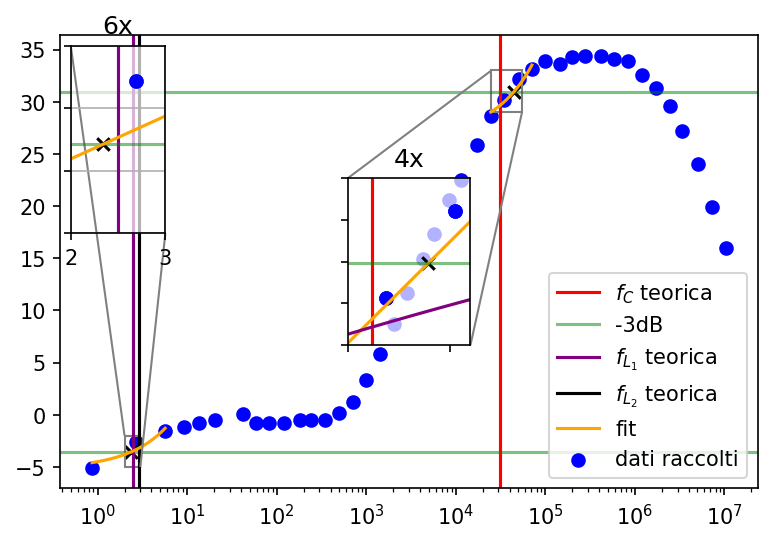

In [62]:
fig = plt.figure()
ay = fig.add_subplot(1, 1, 1)
ay.set_xscale('log')
plt.axvline(1/(2*np.pi*r_e*(C_E)), label='$f_C$ teorica', color="r")
plt.axhline(20*np.log10(T[27:34].mean()/np.sqrt(2)),c="green", alpha=0.5)
plt.axhline(20*np.log10(T[4:13].mean()/np.sqrt(2)),c="green", alpha=0.5, label="-3dB")
plt.xscale("log")
plt.scatter(nu,20*np.log10(T), label="dati raccolti", c="blue")
plt.axvline(1/(2*np.pi*R_B*C_in), label="$f_{L_1}$ teorica", color="purple")
plt.axvline(1/(2*np.pi*R_C*C_out), label="$f_{L_2}$ teorica", color="black")



# faccio il fit lineare
sigma_G = sigmaG(20*np.log10(V_out/V_in))
# per la frequenza bassa
a, b = 0, 3
param_L,cov_L=curve_fit(func,nu[a:b],20*np.log10(T[a:b]))#),sigma=sigma_G[15:18])
m_L=param_L[0]
sigma_m_L=cov_L[0,0]
c_L=param_L[1]
sigma_c=cov_L[1,1]
x_fit_L=np.linspace(nu[a:b].min(),nu[a:b].max(),100)
y_fit_L=func(x_fit_L,m_L,c_L)
plt.plot(x_fit_L,y_fit_L,color="orange",label="fit")

print("f_L = {}".format(
    (20*np.log10(T[4:13].mean()/np.sqrt(2)))/m_L - c_L/m_L
))

xf1 = (20*np.log10(T[4:13].mean()/np.sqrt(2)))/m_L - c_L/m_L
plt.scatter(xf1, m_L*xf1+c_L,c="black", marker="x")
plt.legend()


c, d = 24, 28
param_C,cov_C=curve_fit(func,nu[c:d],20*np.log10(T[c:d]))#),sigma=sigma_G[15:18])
m_C=param_C[0]
sigma_m_C=cov_C[0,0]
c_C=param_C[1]
sigma_C=cov_C[1,1]
x_fit_C=np.linspace(nu[c:d].min(),nu[c:d].max(),100)
y_fit_C=func(x_fit_C,m_C,c_C)
plt.plot(x_fit_C,y_fit_C,color="orange")

print("f_C = {}".format(
    (20*np.log10(T[27:34].mean()/np.sqrt(2)))/m_C - c_C/m_C
))

xf2 = (20*np.log10(T[27:34].mean()/np.sqrt(2)))/m_C - c_C/m_C
plt.scatter(xf2, m_C*xf2+c_C,c="black", marker="x")




#per lo zoom sulla F_L

axins = zoomed_inset_axes(ay, 6,loc="upper left") 
axins.set_xlim(2, 3) 
axins.set_ylim(-5,-2) 
plt.scatter(nu,(20*np.log10(T)),marker='o')
#plt.plot(w,    H(w*2*np.pi), label="curva teorica")
#plt.axhline(20*np.log10( T[8:14].mean()-3 ) ,color="red", label="-3dB")

plt.grid(which="both")
mark_inset(ay, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.xticks(visible=True)
plt.yticks(visible=False)
plt.axvline(1/(2*np.pi*R_B*C_in), label="$\\nu_C$ teorica", color="purple")

plt.plot(x_fit_L,20*np.log10(y_fit_L),color="purple")
plt.scatter(xf1,20*np.log10( T[8:14].mean()-3 ),marker="x",color="black")
axins.patch.set_alpha(.7)
plt.scatter(xf1, m_L*xf1+c_L,c="black", marker="x")
plt.axhline(20*np.log10(T[4:13].mean()/np.sqrt(2)),c="green", alpha=0.5, label="-3dB")
plt.scatter(nu,20*np.log10(T), label="dati raccolti", c="blue")
plt.plot(x_fit_L,y_fit_L,color="orange",label="fit")


plt.title("6x")


#per lo zoom sulla F_H

axins = zoomed_inset_axes(ay, 4,loc="center") 
axins.set_xlim(25000, 55000) 
axins.set_ylim(29,33) 
plt.scatter(nu,(20*np.log10(T)),color="blue", marker='o')
#plt.plot(w,    H(w*2*np.pi), label="curva teorica")
#plt.axhline(20*np.log10( T[8:14].mean()-3 ) ,color="red", label="-3dB")
plt.axvline(1/(2*np.pi*r_e*(C_E)), c="r")
plt.grid(which="both")
mark_inset(ay, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.plot(x_fit_C,y_fit_C,color="orange",label="fit")


plt.plot(x_fit_C,20*np.log10(y_fit_C),color="purple")
plt.scatter(nu,20*np.log10(T), label="dati raccolti", c="blue")
plt.scatter(xf2,m_C*xf2+c_C,marker="x",color="black")
axins.patch.set_alpha(.7)
plt.axhline(20*np.log10(T[27:34].mean()/np.sqrt(2)),c="green", alpha=0.5)


plt.title("4x")





plt.grid()
plt.savefig("Bode.png", dpi=300)

In [13]:
1/(2*np.pi*R_B*C_in)

2.499744987917095

In [17]:
1/(2*np.pi*r_e*(C_E))

30915.87861147928

In [14]:
[500.3,704.5,1001,2946,4988,6997,9976,20180,29838,49692]
nu_2 = np.array([497,693.7,1082,3082,5090,6915,10082,20187])
#V_in_2 = np.array([30.6,33,32.2,32.6,31.8,30.6,30.2,29.3,30.6,29.7])*10**-3
#V_out_2 = np.array([10,14,18,60,125,181,263,540,724,1010])*10**-3
V_in_2 = np.array([30.6,32.6,31.8,31.8,30.6,30.2,31.4,30.6])*10**-3
V_out_2 = np.array([6.6,7.6,8,11.9,15.7,16.1,18.7,21])*10**-3

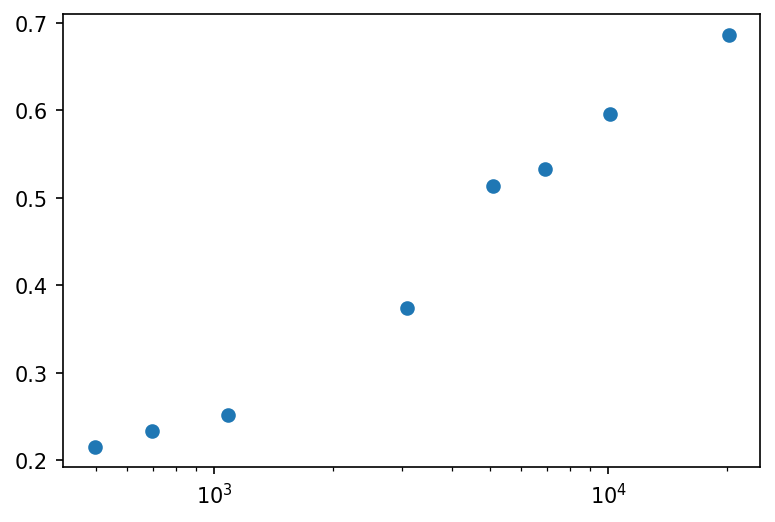

In [15]:
plt.xscale("log")
plt.scatter(nu_2, V_out_2/V_in_2)